Name-Ashutosh Pandey
Task-2
Predict the number of clusters on iris dataset using unsupervised learning and represent visually

In [2]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("E:\GRIP Sparks Foundation\iris.csv")

In [4]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df1=df.iloc[:,[1,2,3,4]].values
print(df1)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

we are finding the best amount of clusters to get most accurate results,for this we are using ELBOW RULE

In [6]:
#wcss=within cluster sum of square
from sklearn.cluster import KMeans
wcss=[]

for k in range (1,15):
    Kmeans=KMeans(n_clusters=k)
    Kmeans.fit(df1)
    wcss.append(Kmeans.inertia_)

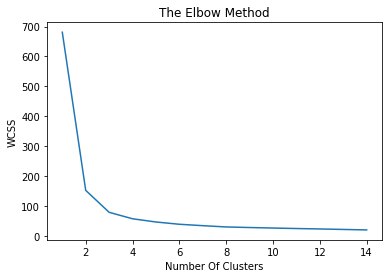

In [7]:
plt.plot(range(1,15),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number Of Clusters")
plt.ylabel("WCSS")
plt.show()

From the above plot we can say that the best number of clusters is either 2 or 3.Because at point 2 and 3 WCSS begins to leveloff.

In [8]:
#lets categorize the data using optimum number of cluster as 3
Kmeans=KMeans(n_clusters = 3,init="k-means++",max_iter = 300,n_init=10,random_state=0)
pred_y=Kmeans.fit_predict(df1)

In [9]:
print(pred_y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


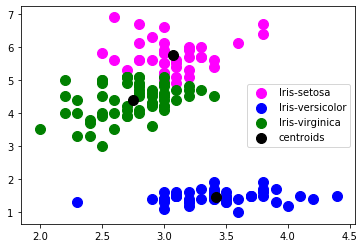

In [9]:
#visualizing the clusters ,we are taking cordinate of 1(sepal-length) and 2(sepal-width) column
plt.scatter(df1[pred_y == 0,1], df1[pred_y == 0,2], s=100, c="magenta",label = "Iris-setosa")
plt.scatter(df1[pred_y == 1,1], df1[pred_y == 1,2], s=100, c="blue",label = "Iris-versicolor")
plt.scatter(df1[pred_y == 2,1], df1[pred_y == 2,2], s=100, c="green",label = "Iris-virginica")

#plotting the centroid of clusters
plt.scatter(Kmeans.cluster_centers_[:,1],Kmeans.cluster_centers_[:,2],s =100, c='black',label="centroids")
plt.legend()
plt.show()



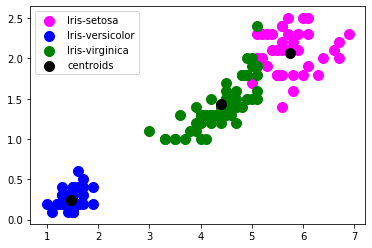

In [10]:
#visualizing the clusters ,we are taking cordinate of 2(sepal-width) and 3(petal-length) column
plt.scatter(df1[pred_y == 0,2], df1[pred_y == 0,3], s=100, c="magenta",label = "Iris-setosa")
plt.scatter(df1[pred_y == 1,2], df1[pred_y == 1,3], s=100, c="blue",label = "Iris-versicolor")
plt.scatter(df1[pred_y == 2,2], df1[pred_y == 2,3], s=100, c="green",label = "Iris-virginica")

#plotting the centroid of clusters
plt.scatter(Kmeans.cluster_centers_[:,2],Kmeans.cluster_centers_[:,3],s =100, c='black',label="centroids")
plt.legend()
plt.show()



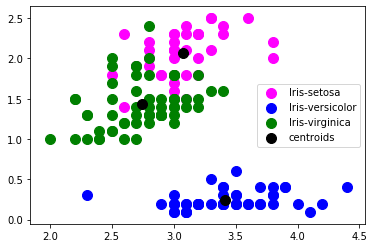

In [13]:
plt.scatter(df1[pred_y == 0,1], df1[pred_y == 0,3], s=100, c="magenta",label = "Iris-setosa")
plt.scatter(df1[pred_y == 1,1], df1[pred_y == 1,3], s=100, c="blue",label = "Iris-versicolor")
plt.scatter(df1[pred_y == 2,1], df1[pred_y == 2,3], s=100, c="green",label = "Iris-virginica")

#plotting the centroid of clusters
plt.scatter(Kmeans.cluster_centers_[:,1],Kmeans.cluster_centers_[:,3],s =100, c='black',label="centroids")
plt.legend()
plt.show()
